--------

<h1 align="center">Attrition Data Analysis</h1>

------

### Objective 1 : To Predict Employee Monthly Income ( Regression Problem )
Approach : Building A linear Model 

### Objective 2 : To Predict Employee Attrition ( Classification Problem )
Approach : Building A Decision Tree Model 

-----

In [296]:
#Importing Required Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from fast_ml.model_development import train_valid_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [1549]:
#Data Source -"https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset"

#Reading Data
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [1550]:
#To see All the columns and Rows While reading

pd.set_option('display.max_columns', 0)
pd.set_option('display.max_rows', 0) 

In [1551]:
#Column Names

data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [1552]:
#Number of Rows and Columns

data.shape

(1470, 35)

In [1553]:
#Data Set Information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [433]:
#Data

data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [1554]:
#Removed the Columns which are not essential for our analysis 

data = data.drop([
    'DailyRate', 'EmployeeCount', 'EmployeeNumber', 'HourlyRate',
    'MonthlyRate', 'RelationshipSatisfaction', 'StandardHours',
    'StockOptionLevel', 'TrainingTimesLastYear','Over18'
],
                 axis=1)

In [435]:
#Data of only required Columns

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   BusinessTravel           1470 non-null   object
 3   Department               1470 non-null   object
 4   DistanceFromHome         1470 non-null   int64 
 5   Education                1470 non-null   int64 
 6   EducationField           1470 non-null   object
 7   EnvironmentSatisfaction  1470 non-null   int64 
 8   Gender                   1470 non-null   object
 9   JobInvolvement           1470 non-null   int64 
 10  JobLevel                 1470 non-null   int64 
 11  JobRole                  1470 non-null   object
 12  JobSatisfaction          1470 non-null   int64 
 13  MaritalStatus            1470 non-null   object
 14  MonthlyIncome            1470 non-null  

#### Plotting Histograms on Selected Columns for Further Analysis

<AxesSubplot:xlabel='YearsAtCompany', ylabel='Count'>

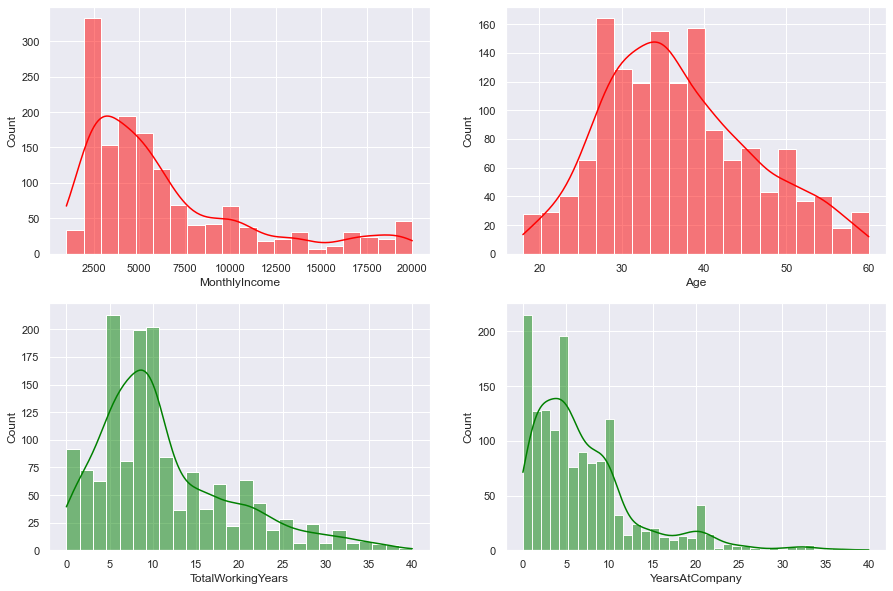

In [536]:
figure,axes = plt.subplots(2,2,figsize=(15,10))
sns.histplot(x=data['MonthlyIncome'],kde=True,fill=True,color='Red',ax=axes[0,0])
sns.histplot(data['Age'],kde=True,fill=True,color='Red',ax=axes[0,1])
sns.histplot(data['TotalWorkingYears'],kde=True,fill=True,color='Green',ax=axes[1,0])
sns.histplot(data['YearsAtCompany'],kde=True,fill=True,color='Green',ax=axes[1,1])

Observations:
- Histogram of Age tend to be a Bell curve shows a normalish behaviour
- MonthlyIncome Histogram is a Right-Skewed Distribution
- MonthlyIncome Have a peak at 2500
- The peak in YearAtCompany is at 0 which might be because of New Recruits at the time of Data collection

<AxesSubplot:ylabel='Attrition'>

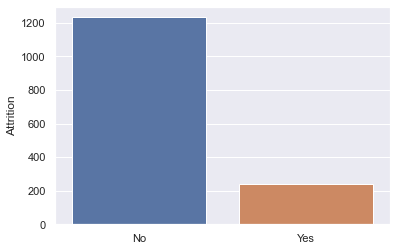

In [535]:
#Attrition Class-wise count Bar plot

sns.barplot(x=['No','Yes'],y=data['Attrition'].value_counts())

Text(0.5, 1.0, 'Bar Plot of JobLevel and Maximum MonthlyIncome')

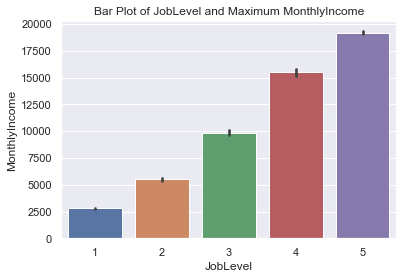

In [534]:
#Barplot of MonthlyIncome With respect to Job Level

sns.barplot(y=data['MonthlyIncome'],x=data['JobLevel'])
plt.title('Bar Plot of JobLevel and Maximum MonthlyIncome')

#### Box plots 

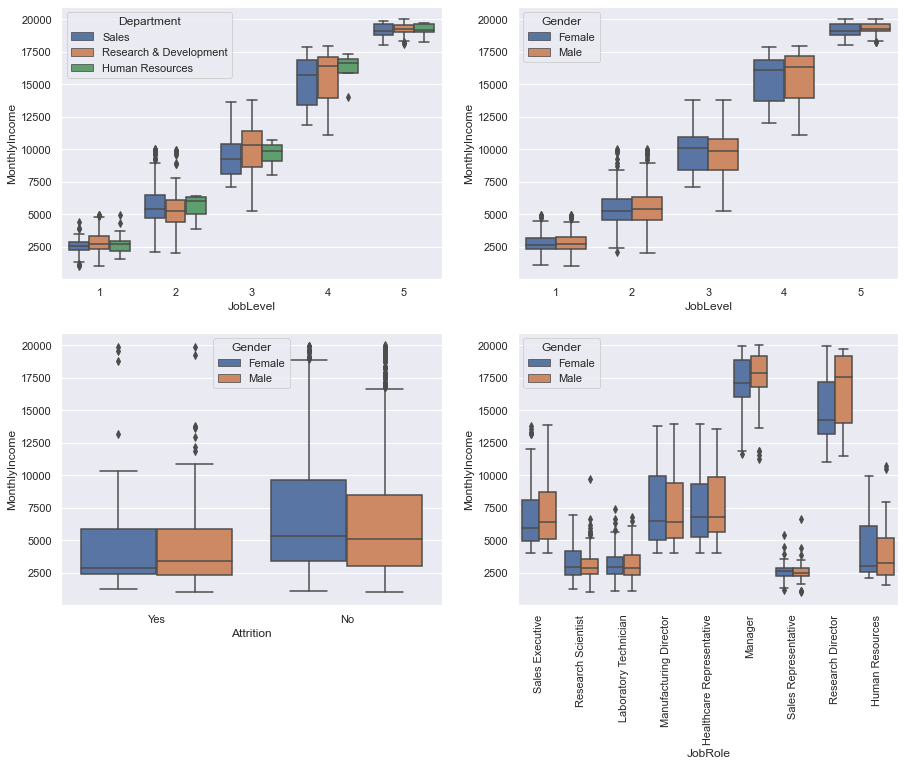

In [533]:
f,axe = plt.subplots(2,2,figsize=(15,11))
sns.boxplot(x="JobLevel", y="MonthlyIncome", hue='Department',  data=data,ax=axe[0,0])
sns.boxplot(x="JobLevel", y="MonthlyIncome", hue='Gender',  data=data,ax=axe[0,1])
sns.boxplot(x="Attrition", y="MonthlyIncome", hue='Gender',  data=data,ax=axe[1,0])
sns.boxplot(x="JobRole", y="MonthlyIncome", hue='Gender',  data=data,ax=axe[1,1])
plt.xticks(rotation='vertical')
plt.show()

Observations:
- Most of the Sales and Research Departments fall in Job Level 3 and 4
- There is a linear trend for Job level and MonthlyIncome
- Managers and Research Directors are highly paid among the other Job Roles
- Surprisingly The median of Female Employee's salary is more than Male employees in Job Level 3 
- Male Attrition in more compared to Females despite getting High salary

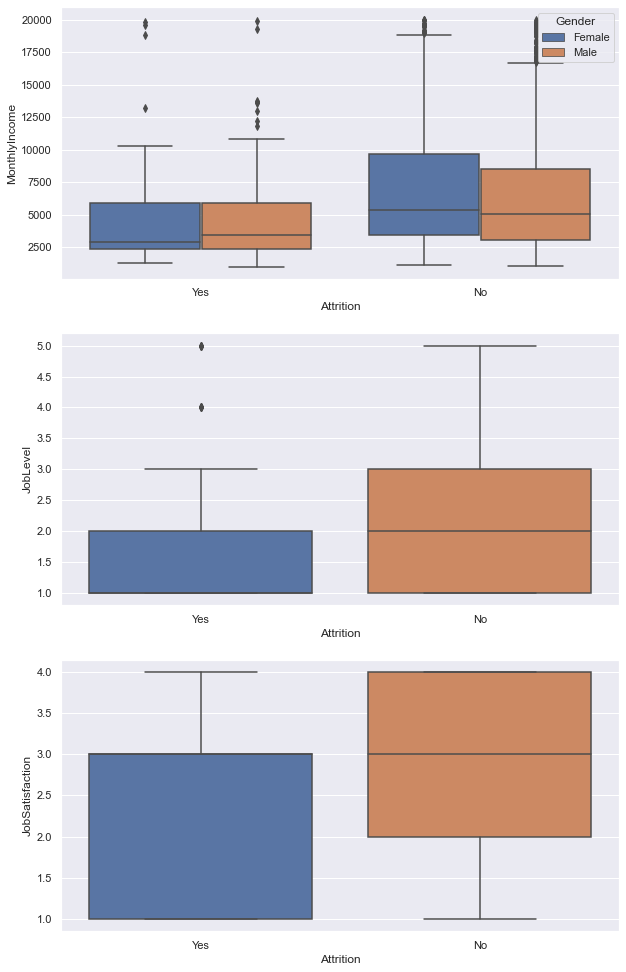

In [532]:
#Box plots with respect to Attrition

f,axe = plt.subplots(3,1,figsize=(10,17))
sns.boxplot(x="Attrition", y="MonthlyIncome", hue='Gender',  data=data,ax=axe[0])
sns.boxplot(x="Attrition", y="JobLevel",data=data,ax=axe[1])
sns.boxplot(x="Attrition", y="JobSatisfaction", data=data,ax=axe[2])
plt.show()

Observations:
- Employees with Job satisfaction less than 3 are more likely to leave the Company
- Job Level less than 2 are more likely to leave the company 

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

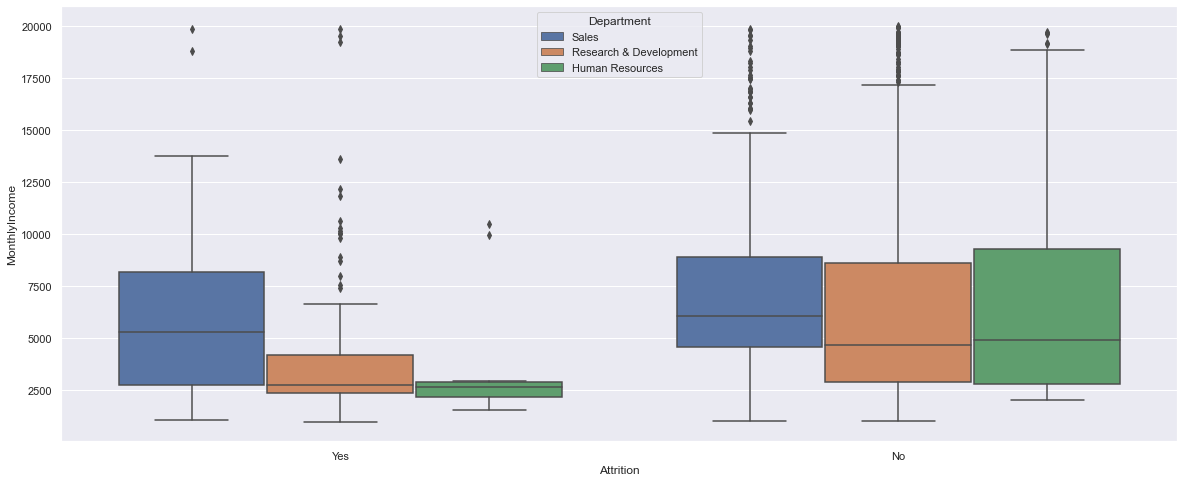

In [531]:
#MonthlyIncome to Attrition Department Wise Boxplots

plt.figure(figsize=(20,8))
sns.boxplot(x="Attrition", y="MonthlyIncome", hue='Department',  data=data)

Observations:
- More Employees from Sales Department are likely to leave the company
- The median for sales department for Yes and No are almost similar so Monthly Income is not influencing in Attrition rate in case of Sales Department/

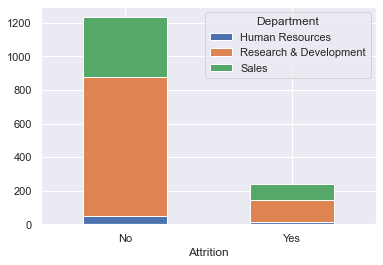

In [530]:
#Attrtition barplot Department Wise

d = pd.crosstab(data['Attrition'],data['Department'])
sns.set_theme(style='darkgrid')
import seaborn as sns
d.plot(kind='bar',stacked=True)
plt.xticks(rotation='horizontal')
plt.show()

Observations:
- As we Have seen Research and Development Department is comparatively having less Monthly Income So there is a Higher Attrition for this Department followed by sales 

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='MonthlyIncome'>

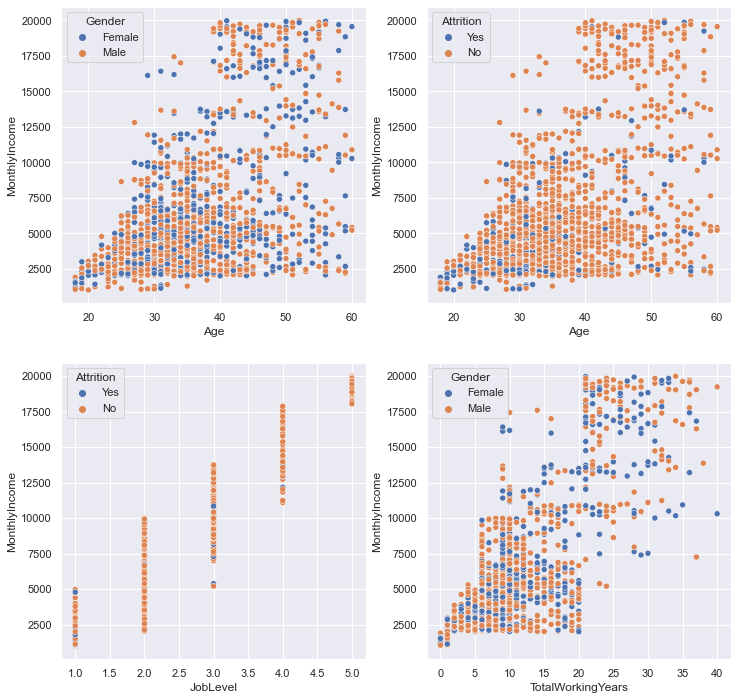

In [1581]:
#Scatter Plots with respect to MonthlyIncome

fig,ax = plt.subplots(2,2,figsize=(12,12))
sns.scatterplot("Age","MonthlyIncome",data=data,hue="Gender",ax=ax[0,0])
sns.scatterplot("Age","MonthlyIncome",data=data,hue="Attrition",ax=ax[0,1])
sns.scatterplot("JobLevel","MonthlyIncome",data=data,hue="Attrition",ax=ax[1,0])
sns.scatterplot("TotalWorkingYears","MonthlyIncome",data=data,hue="Gender",ax=ax[1,1])

Observations:
- There is a High Linear Trend for Monthly Income and Job Level
- Attrition Rate for Job Levels less than or equal to 3 is Comparatively high
- There are more number of Highly paid Male Employees than Female Employees
- Employees with Age Between 20 and 30 is having a High Attrition Rate
- There are more Male employees under 20 Total Working Years

#### Encoding Label Data for Model Building 

In [792]:
#LabelEncoder Function to Encode Categorical Data
LE = LabelEncoder()

#Encoding all the Categorical data
for i in data.columns:
    if data[i].dtype=='object':
        data[i]=LE.fit_transform(data[i])

data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,2,1,2,1,2,0,3,2,7,4,2,5993,8,1,11,3,8,1,6,4,0,5
1,49,0,1,1,8,1,1,3,1,2,2,6,2,1,5130,1,0,23,4,10,3,10,7,1,7
2,37,1,2,1,2,2,4,4,1,2,1,2,3,2,2090,6,1,15,3,7,3,0,0,0,0
3,33,0,1,1,3,4,1,4,0,3,1,6,3,1,2909,1,1,11,3,8,3,8,7,3,0
4,27,0,2,1,2,1,3,1,1,3,1,2,2,1,3468,9,0,12,3,6,3,2,2,2,2


- Encoded Categorical Data for fitting the model
- Used Label Encoding as there are many categorical features which are Important and cannot be Ignored
- Did not use OneHotEncoding for 2 reasons
 - As there are many columns that we are considering and this makes the model more complex with more columns
 - And there are many categorical features to consider and cannot encode only specific features as we dont know their importance yet

#### Heat Map of Correlation of the Features

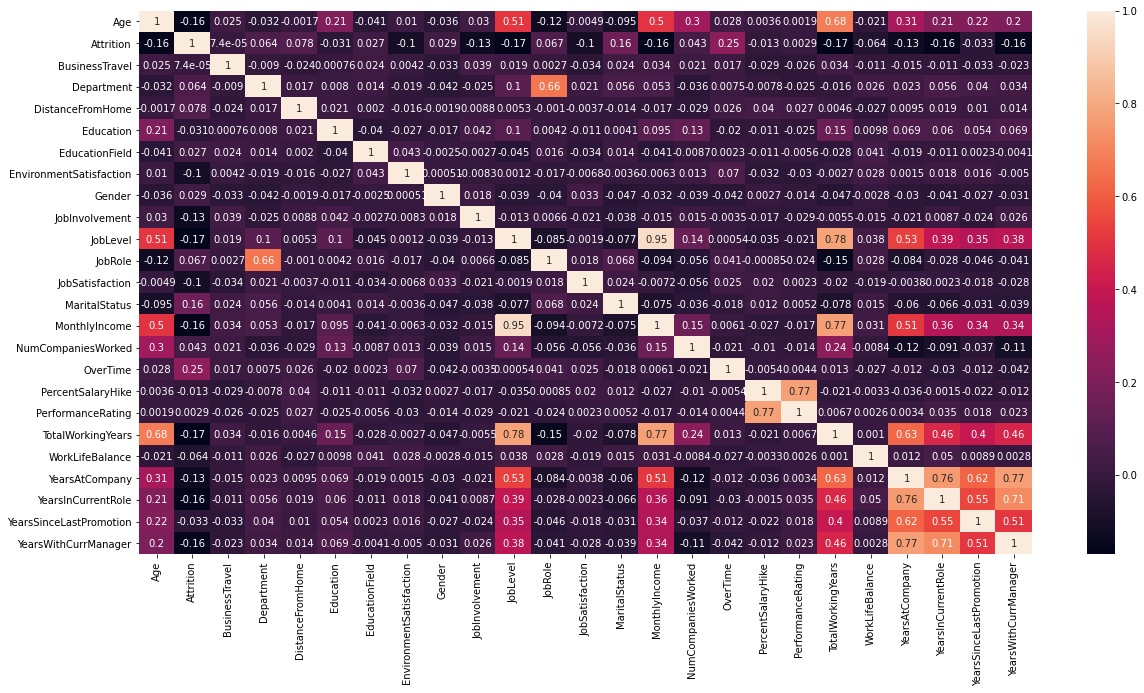

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

- As we Previously observed a linear trend for JobLevel and MonthlyIncome there is a High Collinearity between them
- TotalWorkingYears, YearsAtCompany and Age are also important features which explain the MonthlyIncome

### Objective 1 : To Predict Employee Monthly Income ( Regression Problem )
Approach : Building A linear Model 

#### Model 1

In [300]:
#Considering all the Columns for the Linear Regression model

X=data.drop('MonthlyIncome',axis=1)
y=data['MonthlyIncome']

#Train-Test-Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

#Fitting the Model
reg = LinearRegression().fit(X_train,y_train)

#Model Score on Test data
reg.score(X_test,y_test)

0.9124970169667422

- Considered all the features to check Raw Model
- As we can see there is a hight score for the model

In [301]:
#Prediction of the Model on Test data
y_pred = reg.predict(X_test)

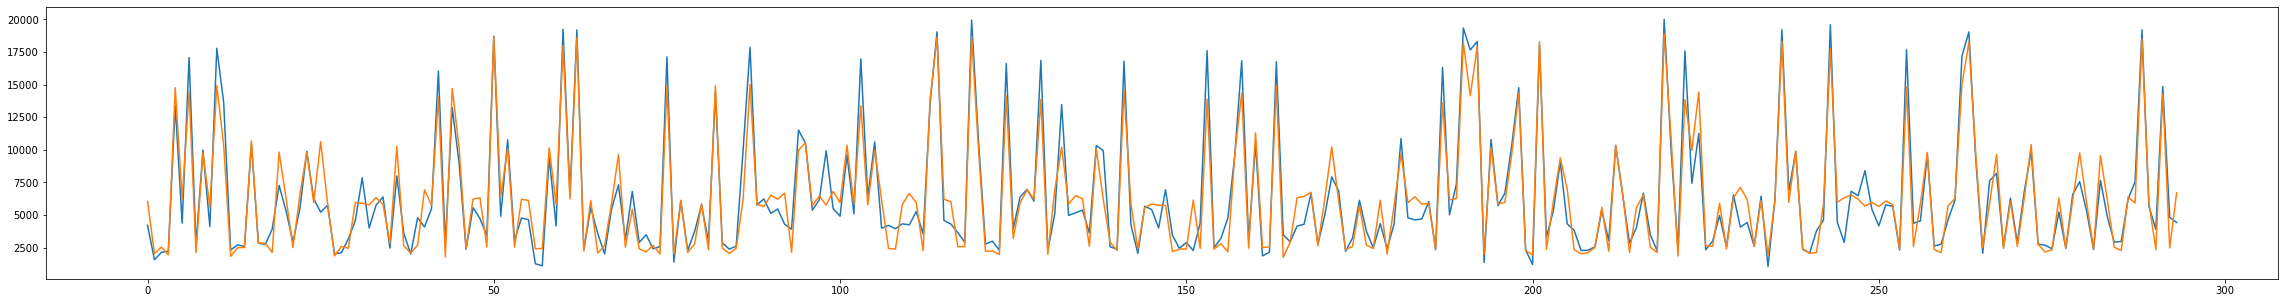

In [302]:
#Visualizing the Actual and predicted value
x = range(len(y_test))
fig = plt.figure(figsize=(40,5))
plt.plot(x,y_test)
plt.plot(x,y_pred)

In [303]:
#MSE
mean_squared_error(y_test,y_pred)

1983937.9851011168

In [304]:
#R-squared
r2_score(y_test,y_pred)

0.9124970169667422

In [305]:
#Mean Absolute Percentage Error

mape = np.mean(np.abs((y_test - y_pred)/y_test))*100

mape

20.194552869559704

#### Building a model for checking feature Importance

In [306]:
#Considering all the feautures
X=data.drop('MonthlyIncome',axis=1)
y=data['MonthlyIncome']

#Train-Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

#StandardScaler Function to scale the X's features
sc_X = StandardScaler()

#Scaling on X
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()

#StandardScaler Function to scale the Y
y_train = sc_y.fit_transform(np.asarray(y_train).reshape(-1,1))
y_test = sc_y.fit_transform(np.asarray(y_test).reshape(-1,1))

#Fitting model on scaled data
reg = LinearRegression().fit(X_train,y_train)

#Getting the Coefficients to Get the feature Importance
reg.coef_

array([[-2.50674146e-02,  2.62357844e-04,  1.19272875e-02,
        -6.06376307e-02, -2.13979888e-02, -2.23778929e-03,
         2.49796561e-03, -1.59058738e-02, -3.12439912e-04,
        -3.54227246e-03,  9.07974113e-01,  3.46586174e-02,
        -3.31684317e-04, -7.84781148e-04,  4.07635884e-04,
         1.75426247e-03,  1.49760496e-02, -1.20572071e-02,
         9.13495569e-02, -5.21791684e-03,  1.87343493e-04,
        -5.63739871e-03,  1.86005944e-02, -3.66421017e-02]])

In [307]:
#Assigning the values to a dictionary, converting to a datafram and Sorting by coefficient values
d = {'Col':data.drop('MonthlyIncome',axis=1).columns,'Coef':np.abs(reg.coef_[0])}

d = pd.DataFrame(d)

d = d.sort_values(by='Coef',ascending=False)

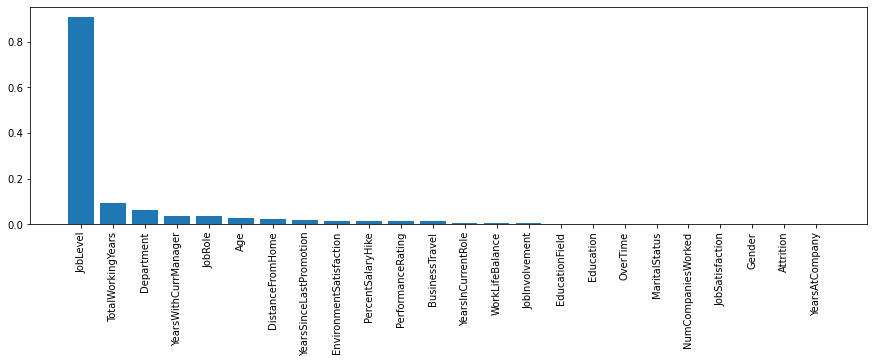

In [308]:
#Plotting the Results
figure = plt.figure(figsize=(15,4))
plt.bar(d['Col'],d['Coef'])
plt.xticks(rotation='vertical')
plt.show()

Model 2

#### Considering Only Important Features

In [309]:
#Considering only the Important Variables

X=data[['JobLevel','TotalWorkingYears','Department','YearsWithCurrManager','JobRole','Age','DistanceFromHome']]
y=data['MonthlyIncome']

#Using OLS
X = sm.add_constant(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
regS = sm.OLS(y,X)
rs = regS.fit()

#Model summary
rs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          MonthlyIncome   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     2078.
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        16:31:51   Log-Likelihood:                -12758.
No. Observations:                1470   AIC:                         2.553e+04
Df Residuals:                    1462   BIC:                         2.557e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1032.3321    206.933     -4.989      0.000   -1438.250    -626.414
JobLevel              3852.1154     55.250     69.721      0.000    3743.737    3960.494
TotalWorkingYears       59.4847      9.632      6.175      0.000      40.590      78.380
Department            -519.8210     96.802     -5.370      0.000    -709.707    -329.935
YearsWithCurrManager   -43.4270     11.923     -3.642      0.000     -66.815     -20.038
JobRole                 61.7635     20.632      2.994      0.003      21.293     102.234
Age                    -11.2742      5.647     -1.997      0.046     -22.351      -0.198
DistanceFromHome       -12.0784      4.591     -2.631      0.009     -21.085      -3.072
==============================================================================
Omnibus:                       15.383   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.213
Skew:                          -0.017   Prob(JB):                     5.52e-06
Kurtosis:                       3.628   Cond. No.                         233.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [310]:
#Adjusted R-squared
rs.rsquared_adj

0.9082525838207769

In [311]:
#Prediction on Test data
y_pred = rs.predict(X_test)

In [312]:
#R-squared
r2_score(y_test,y_pred)

0.9138792550534544

In [313]:
#Mean Absolute Percentage Error
mape = np.mean(np.abs((y_test - y_pred)/y_test))*100

mape

20.234309294630187

- Model with Selected Features also Yield the same results

### Objective 2 : To Predict Employee Attrition ( Classification Problem )
Approach : Building A Decision Tree Model 

- Train-validation-Test Split

In [1515]:
#Train-validation-Test split 

X_train1, y_train1, X_valid1, y_valid1, X_test1, y_test1 = train_valid_test_split(data, 
                                                                                  target='Attrition', 
                                                                                  train_size=0.60, valid_size=0.20, 
                                                                                  test_size=0.20,
                                                                                 )

- Considered 65% train data, and 20% each for Validation and Test 

#### Tuning Hyper Parameters

In [1328]:
#Using GridSerachCV function for best tree parameters

param_dist = {"max_depth": range(1,20),
              "max_features": range(1,23),
              "min_samples_split": range(1,20),
              "criterion": ["gini"]}
  
#Initial Decision Tree classifier
tree = DecisionTreeClassifier()

#GridSearchCV Function
tree_cv = GridSearchCV(tree, param_dist,cv=5)
  
#Fitting our data
tree_cv.fit(X_train1, y_train1)
  
#Best Parameters and Score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 9, 'min_samples_split': 16}
Best score is 0.8492146596858638


In [1516]:
#Fitting a Decision tree on best Parameters
t = DecisionTreeClassifier(criterion='gini',max_depth=3,max_features=9,min_samples_split=16)
t.fit(X_train1,y_train1)

#Cross-validating on validation data
max(cross_val_score(t, X_valid1, y_valid1, cv=10))

0.96

In [1517]:
#Cross-validating on Test data
max(cross_val_score(t, X_test1, y_test1, cv=10))

0.9230769230769231

In [1518]:
#Confusion matrix
confusion_matrix(y_test1,y_pred2)

array([[211,   5],
       [ 41,   1]], dtype=int64)

In [1519]:
#Getting Feature importance
t.feature_importances_

array([0.22017019, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.07769441, 0.        , 0.        , 0.        ,
       0.11381142, 0.        , 0.11668092, 0.        , 0.        ,
       0.10984821, 0.        , 0.        , 0.04182938, 0.        ,
       0.        , 0.        , 0.        , 0.31996546])

#### Considering only Important Features as a reason of using less fields in UI

In [1459]:
#Fitting Decision tree model on best params with Important features for UI purpose of ease
FDT = DecisionTreeClassifier(criterion='gini',max_depth=3,max_features=4,min_samples_split=16)

In [1462]:
#Important Features with label
xxx=data[['Attrition','Age','JobLevel','JobRole','WorkLifeBalance','YearsAtCompany','YearsSinceLastPromotion']]

In [1528]:
#Train-Validation-Test split
X_train1, y_train1, X_valid1, y_valid1, X_test1, y_test1 = train_valid_test_split(xxx, 
                                                                                  target='Attrition', 
                                                                                  train_size=0.65, valid_size=0.15, 
                                                                                  test_size=0.15,
                                                                                 )

In [1506]:
#Best params with Best feautures

param_dist = {"max_depth": range(1,20),
              "max_features": range(1,23),
              "min_samples_split": range(1,20),
              "criterion": ["gini"]}
  
#Initial Decision Tree classifier
tree = DecisionTreeClassifier()

#GridSearchCV Function
tree_cv = GridSearchCV(tree, param_dist,cv=5)

#Fitting our data
tree_cv.fit(X_train1, y_train1)
  
#Best Parameters and Score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 4, 'max_features': 2, 'min_samples_split': 10}
Best score is 0.8481675392670157


In [1507]:
#Final Decision Tree with best Features and Best parameters
FDT = DecisionTreeClassifier(criterion='gini',max_depth=4,max_features=2,min_samples_split=10)

In [1508]:
#Model Building and Fit
FDT.fit(X_train1,y_train1)

#MAX cross-validation score on validation data
max(cross_val_score(FDT,X_valid1,y_valid1,cv=10))

0.8461538461538461

In [1509]:
#MAX cross-validation score on Test data
max(cross_val_score(FDT,X_test1,y_test1,cv=10))

0.9230769230769231

In [1510]:
#Feature Importance
FDT.feature_importances_

array([0.22722582, 0.33151125, 0.09312098, 0.14062146, 0.16525646,
       0.04226403])

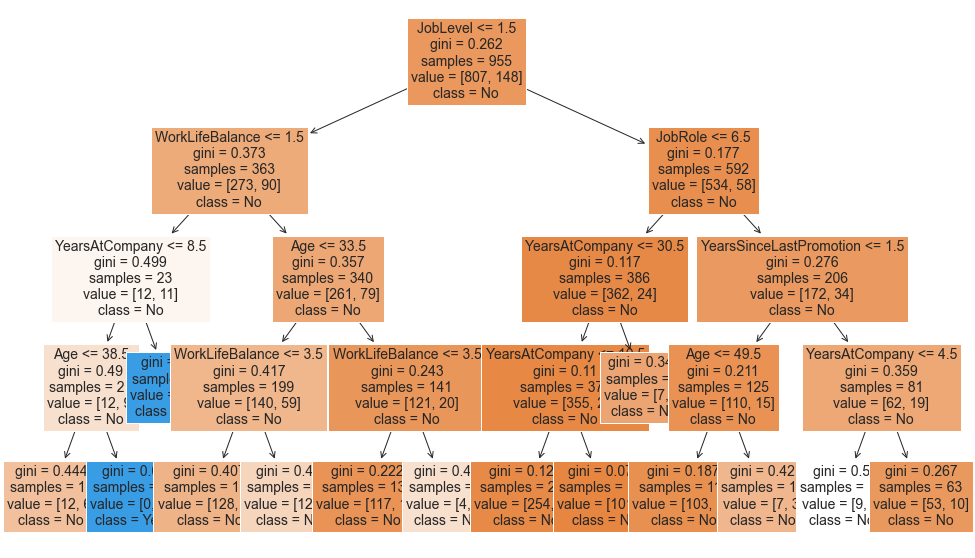

In [1512]:
#Plotting The tree

plt.figure(figsize=(17,10))
plot_tree(FDT,fontsize=14,feature_names=X_train1.columns,class_names=['No','Yes'],filled=True)
plt.show()

#### Using pickle Library to save the model for Future Use in any applications

In [882]:
#Importing Pickle Library
import pickle

In [914]:
#Dumping the Linear Model using pickle

LinearModelMonthlyIncome = 'Linear_model.sav'
pickle.dump(rs, open(LinearModelMonthlyIncome, 'wb'))

In [1520]:
#Dumping the Linear Model using pickle

DTModelAttrition = 'DT_model.sav'
pickle.dump(FDT, open(DTModelAttrition, 'wb'))

In [1521]:
#Checking for Linear Model Functionality

loaded_model = pickle.load(open(LinearModelMonthlyIncome, 'rb'))
y_pred1 = loaded_model.predict([ 1.,  2., 10.,  1.,  8.,  4., 37., 10.])
y_pred1

array([6108.63413497])

In [1541]:
#Check for Decision Tree Model Functionality

loaded_model = pickle.load(open(DTModelAttrition, 'rb'))
y_pred1 = loaded_model.predict(np.asarray([30,2,7,2,2,2]).reshape(1,-1))
y_pred1

array([0])